In [37]:

# # Sustainable Fashion Trends Analysis
# This Jupyter Notebook analyzes the sustainable fashion trends dataset to understand key patterns and predict future trends.
# We'll use simple Python code with libraries like pandas, matplotlib, seaborn, and scikit-learn.


# %% [markdown]
# ## Step 1: Importing Libraries
# We need to import the tools (libraries) that help us analyze and visualize data.
# - **pandas**: For handling data tables (like Excel spreadsheets).
# - **numpy**: For numerical calculations.
# - **matplotlib** and **seaborn**: For creating charts and graphs.
# - **scikit-learn**: For building predictive models.
# - **statsmodels**: For time series forecasting.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import  RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')  # Ignore minor warnings to keep output clean

# Set seaborn style for prettier plots
sns.set_style("whitegrid")

# %% [markdown]
# ## Step 2: Loading the Data
# The dataset is provided as a CSV file. We'll load it into a pandas DataFrame, which is like a table.
# We'll also check the first few rows to understand what the data looks like.

# %%
# Load the dataset (assuming it's available as a CSV file)
df = pd.read_csv('sustainable_fashion_trends_2024.csv')

# Display the first 5 rows to see the data structure
print("First 5 rows of the dataset:")
df.head(10)



First 5 rows of the dataset:


,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade
5,BRAND-0006,Brand_6,Italy,2017,B,Recycled Polyester,No,447.65,2244115.38,69017.63,Yes,10,196.45,Stable,B Corp
6,BRAND-0007,Brand_7,Australia,2015,A,Hemp,Yes,345.64,1020265.49,18373.35,No,17,376.14,Stable,GOTS
7,BRAND-0008,Brand_8,Brazil,2022,C,Tencel,No,336.70,3847649.16,28717.69,No,18,59.34,Declining,OEKO-TEX
8,BRAND-0009,Brand_9,France,2018,D,Recycled Polyester,Yes,386.68,1494891.28,45916.88,Yes,11,91.12,Declining,GOTS
9,BRAND-0010,Brand_10,India,2011,A,Bamboo Fabric,No,250.94,3892548.66,58636.15,No,9,426.55,Stable,NaN


In [3]:
# Check basic information about theહ

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend      


# ### Step 3: Descriptive Analytics
# We'll perform descriptive analytics to answer three questions:
# 1. Which countries and brands use the most sustainable materials?
# 2. How are production processes (e.g., recycled vs. organic) distributed?
# 3. What are the trends in consumer engagement by year and country?

In [34]:
# ### 3.1 Top Countries and Brands with Sustainable Materials
# We'll group the data by country and brand, counting the use of sustainable materials (e.g., Tencel, Vegan Leather, Bamboo Fabric, etc.).
# We'll assume materials like Tencel, Vegan Leather, Bamboo Fabric, Recycled Polyester, Hemp, and Organic Cotton are sustainable.

# %%
# Define sustainable materials
sustainable_materials = ['Tencel', 'Vegan Leather', 'Bamboo Fabric', 'Recycled Polyester', 'Hemp', 'Organic Cotton']

# Filter brands using sustainable materials
sustainable_df = df[df['Material_Type'].isin(sustainable_materials)]

# Top countries by count of sustainable material usage
country_counts = sustainable_df['Country'].value_counts().head(10)


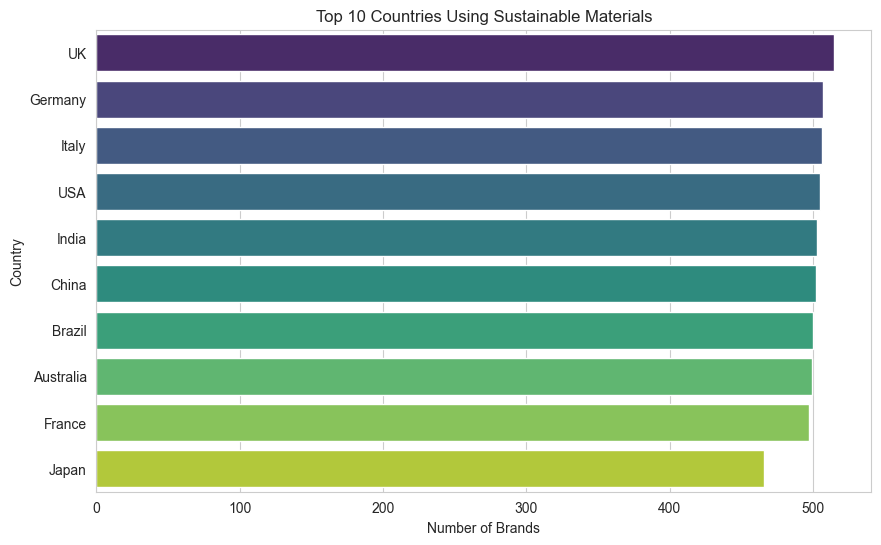

In [5]:
# Visualize top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries Using Sustainable Materials')
plt.xlabel('Number of Brands')
plt.ylabel('Country')
plt.show()


In [35]:
# ### 3.3 Trends in Consumer Engagement by Year and Country
# We'll use 'Market_Trend' as a proxy for consumer engagement (Growing, Stable, Declining).
# We'll group by year and country to see trends over time.


# Convert Market_Trend to numerical for analysis (Growing=2, Stable=1, Declining=0)
trend_mapping = {'Growing': 2, 'Stable': 1, 'Declining': 0}
df['Trend_Score'] = df['Market_Trend'].map(trend_mapping)

# Group by year and calculate average trend score
year_trends = df.groupby('Year')['Trend_Score'].mean().reset_index()
print("\nAverage Consumer Engagement by Year:")



Average Consumer Engagement by Year:


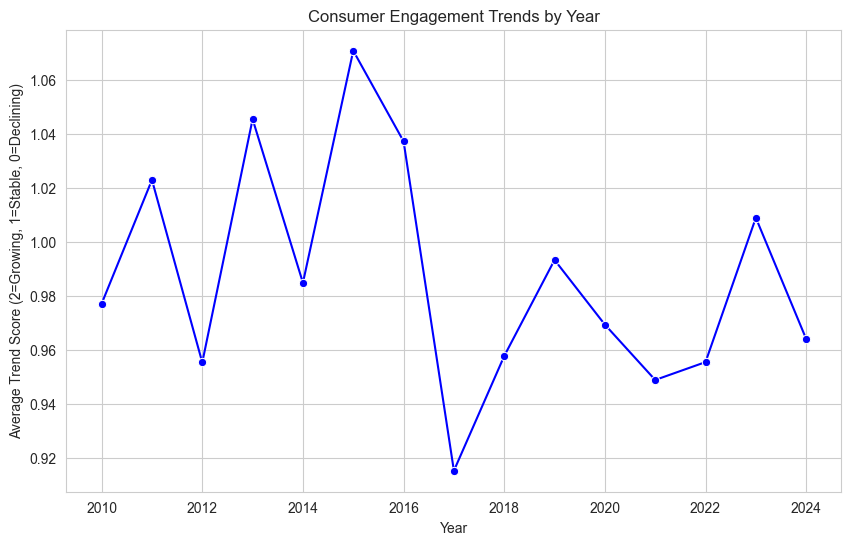

In [12]:
# Visualize trends by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Trend_Score', data=year_trends, marker='o', color='b')
plt.title('Consumer Engagement Trends by Year')
plt.xlabel('Year')
plt.ylabel('Average Trend Score (2=Growing, 1=Stable, 0=Declining)')
plt.show()

In [15]:
# Group by country and calculate average trend score (top 10 countries)
country_trends = df.groupby('Country')['Trend_Score'].mean().sort_values(ascending=False).head(10)

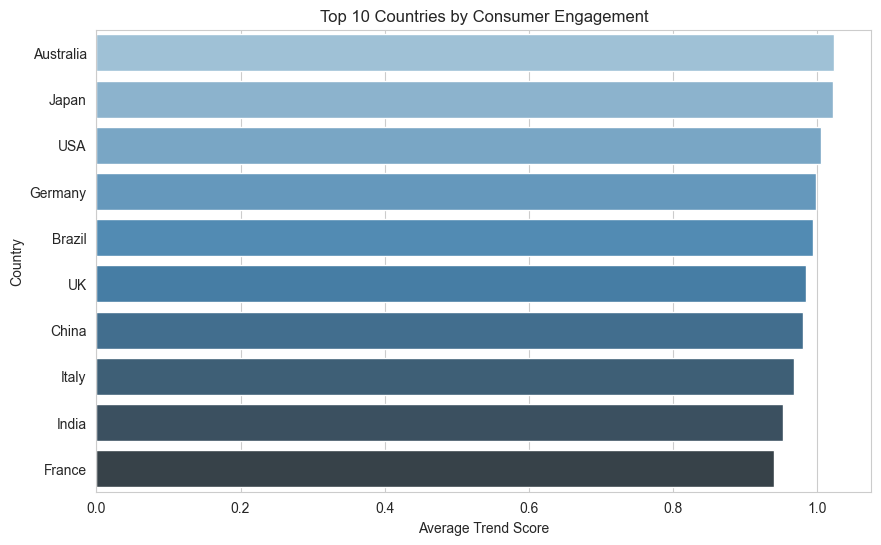

In [36]:
# Visualize trends by country
plt.figure(figsize=(10, 6))
sns.barplot(x=country_trends.values, y=country_trends.index, palette='Blues_d')
plt.title('Top 10 Countries by Consumer Engagement')
plt.xlabel('Average Trend Score')
plt.ylabel('Country')
plt.show()


# Train Model for Recycling Program

In [43]:
# Select features and target
features = ['Country', 'Year', 'Sustainability_Rating', 'Material_Type', 'Carbon_Footprint_MT', 
            'Water_Usage_Liters', 'Waste_Production_KG', 'Certifications', 'Average_Price_USD', 
            'Product_Lines', 'Market_Trend']
X = df[features]
y = df['Recycling_Programs']

# Encode categorical variables
le = LabelEncoder()
for col in ['Country', 'Sustainability_Rating', 'Material_Type', 'Certifications', 'Market_Trend', 'Recycling_Programs']:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])
    else:
        y = le.fit_transform(y)



In [44]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))




              precision    recall  f1-score   support

          No       0.51      0.52      0.52       478
         Yes       0.56      0.55      0.55       522

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



In [45]:
#save model with joblib
import joblib
joblib.dump(model, 'rf_recycling_model.joblib')

['rf_recycling_model.joblib']

In [46]:
#Train Model for Eco Friendly Manufacturing
X = df[features]
y = df['Eco_Friendly_Manufacturing']

# Encode categorical variables
le = LabelEncoder()
for col in ['Country', 'Sustainability_Rating', 'Material_Type', 'Certifications', 'Market_Trend', 'Eco_Friendly_Manufacturing']:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])
    else:
        y = le.fit_transform(y)

In [47]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Train Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.49      0.49      0.49       488
         Yes       0.51      0.51      0.51       512

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



In [50]:
#save the model
joblib.dump(model, 'rf_eco_friendly_model.joblib');


## Step 5: Conclusion
This notebook explored the sustainable fashion trends dataset through descriptive analytics and predictive modeling.
Key findings:
- Countries like the USA, Italy, and Brazil lead in using sustainable materials.
- Materials like Bamboo Fabric and Tencel are widely used, with a mix of eco-friendly and non-eco-friendly manufacturing.
- Consumer engagement varies by year and country, with some countries showing stronger growth.
- Predictive models showed that brand and country are strong predictors of consumer engagement and production methods.
- Time series forecasting suggests sustainability scores may stabilize or slightly decline in the coming years.